<a href="https://colab.research.google.com/github/kenshi-miyabe/domain-cloring/blob/main/domain_coloring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

def domain_coloring(func, re_min=-10, re_max=10, im_min=-10, im_max=10, width=800, height=800):
    """
    Performs domain coloring for a given complex function and visualizes it.

    Parameters:
    func : function
        A function that takes a complex number as input and returns a complex number.
    re_min : float
        Minimum value for the real part.
    re_max : float
        Maximum value for the real part.
    im_min : float
        Minimum value for the imaginary part.
    im_max : float
        Maximum value for the imaginary part.
    width : int
        Width of the output image in pixels.
    height : int
        Height of the output image in pixels.

    Returns:
    None
        This function only displays the image and does not return any value.
    """
    # Create a grid of complex numbers
    re = np.linspace(re_min, re_max, width)
    im = np.linspace(im_min, im_max, height)
    Re, Im = np.meshgrid(re, im)
    Z = Re + 1j * Im

    # Evaluate the function on the grid
    W = np.vectorize(func)(Z)

    # Calculate the hue based on the argument (phase) of W
    H = (np.angle(W) % (2 * np.pi)) / (2 * np.pi)

    # Calculate the saturation based on the magnitude of W
    S = 1 - np.exp(-np.abs(W))

    # Set the value to 1
    V = np.ones_like(H)

    # Create the HSV image
    HSV = np.zeros((height, width, 3))
    HSV[..., 0] = H
    HSV[..., 1] = S
    HSV[..., 2] = V

    # Convert HSV to RGB
    RGB = hsv_to_rgb(HSV)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(RGB, extent=(re_min, re_max, im_min, im_max))
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.title('Domain Coloring')
    plt.show()



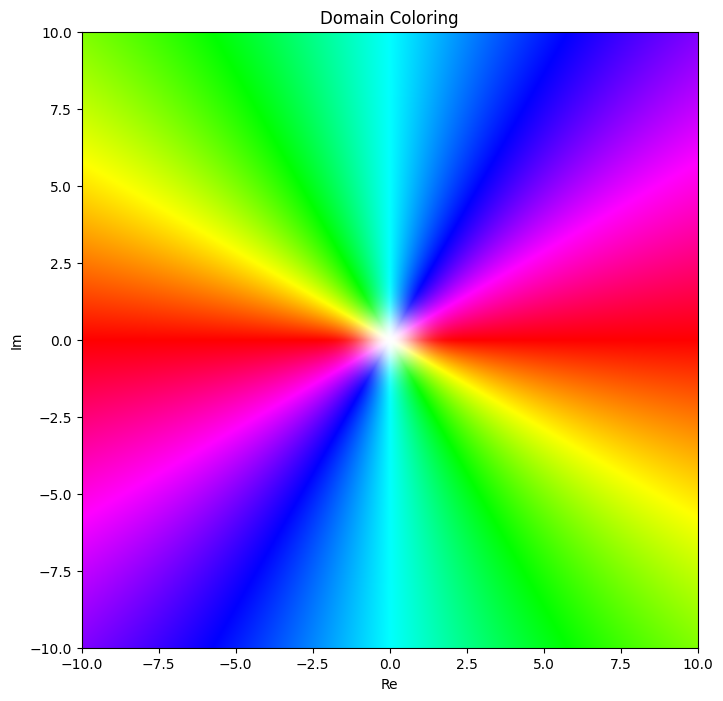

In [35]:
import cmath

# Example usage with a specific function, e.g., f(z) = z^2
domain_coloring(lambda z: z**2)


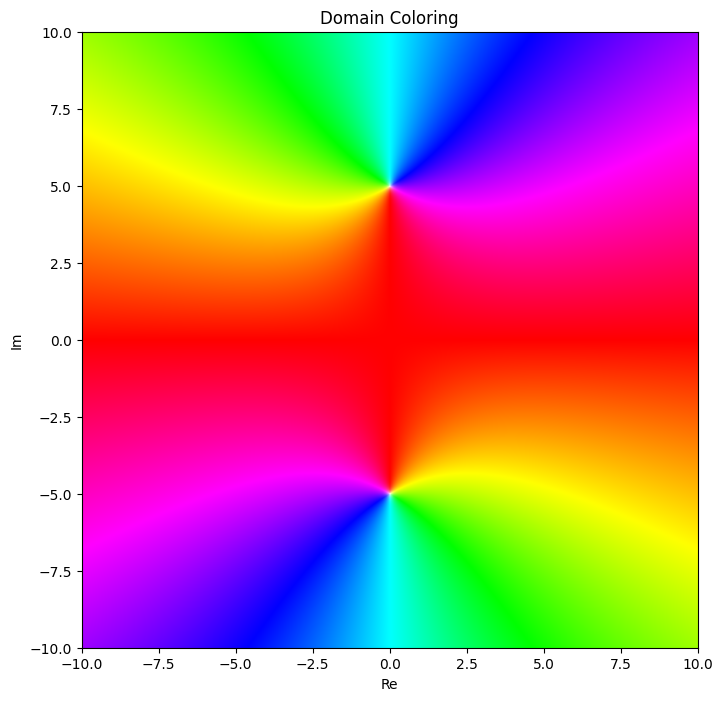

In [36]:
domain_coloring(lambda z: (z**2+25))

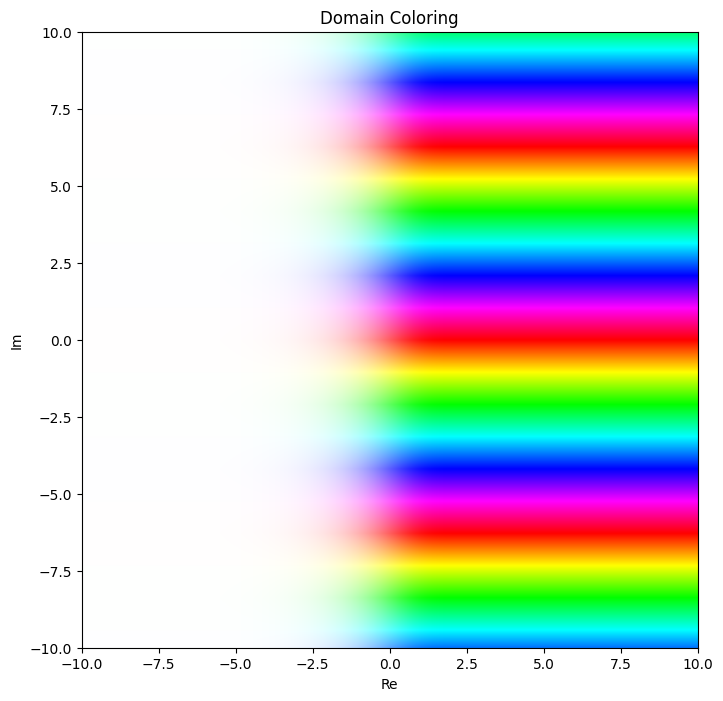

In [37]:
domain_coloring(lambda z: cmath.exp(z))


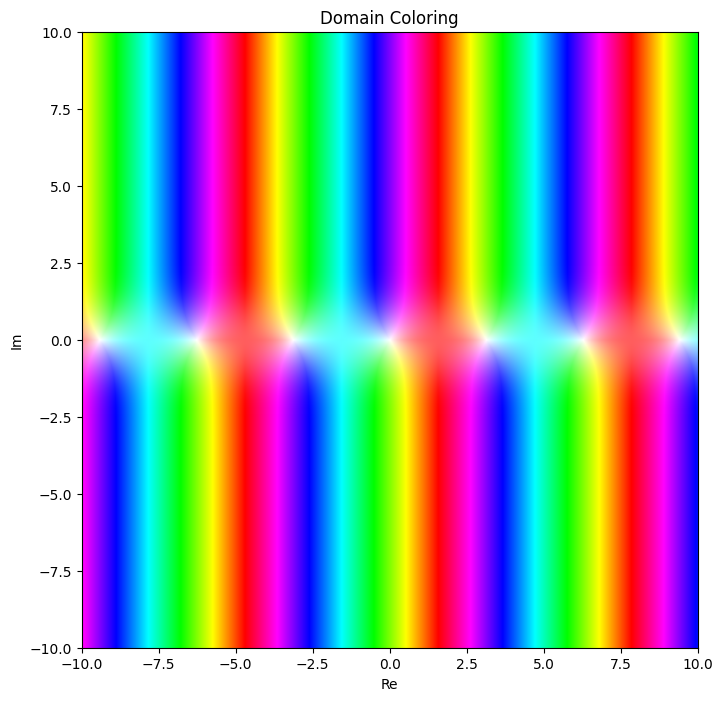

In [38]:
domain_coloring(lambda z: cmath.sin(z))


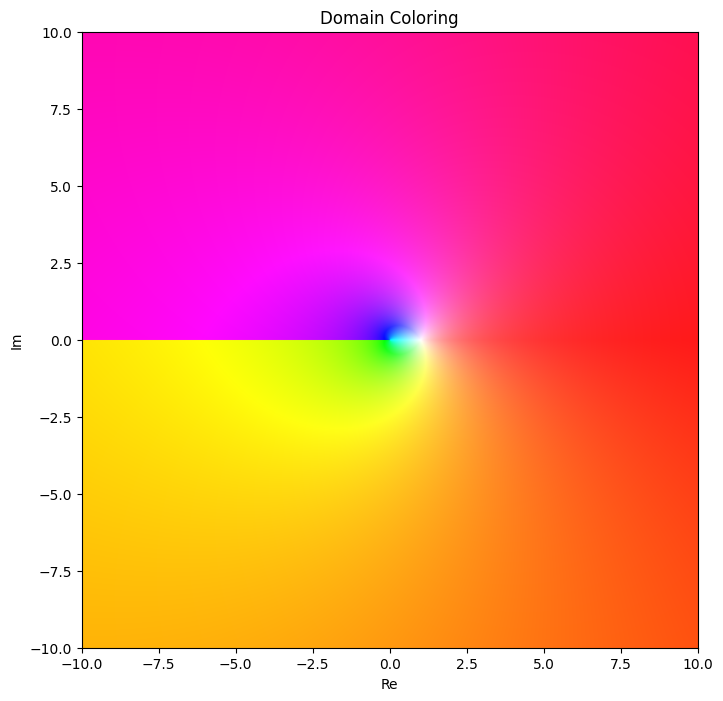

In [39]:
domain_coloring(lambda z: cmath.log(z))